<font color=darkblue> 

## Описание задачи
___
    
### Нужно решить, где бурить новую скважину.
#### Шаги для выбора локации:
 - В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
 - Строят модель для предсказания объёма запасов в новых скважинах;
 - Выбирают скважины с самыми высокими оценками значений;
 - Определяют регион с максимальной суммарной прибылью отобранных скважин.

## Описание данных

 - id — уникальный идентификатор скважины;
 - f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
 - product — объём запасов в скважине (тыс. баррелей).

## Вызываю библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState
from scipy import stats as st
import matplotlib.pyplot as plt

<font color=darkblue> 
# Подготовка данных

## 1. Открываю датасеты

In [2]:
region_1 = pd.read_csv('geo_data_0.csv')
region_2 = pd.read_csv('geo_data_1.csv')
region_3 = pd.read_csv('geo_data_2.csv')

## 2. Обучу модель, получу RMSE и среднее

In [3]:
def model(df):
    features = df.drop(['product', 'id'], axis = 1)
    target = df['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    model = LinearRegression(n_jobs= -1).fit(features_train, target_train)
    predictions = model.predict(features_valid)
    df['predicted'] = model.predict(features)
    mean = predictions.mean()
    print('Среднее предсказанного', predictions.mean())
    print('Среднее выборки', target_train.mean()) 
    print('RMSE', mean_squared_error(target_valid, predictions)**0.5)
    return target, predictions, mean

### Регион 1

In [4]:
target_1, predictions_1, mean_1 = model(region_1)

Среднее предсказанного 92.59256778438038
Среднее выборки 92.64046775305694
RMSE 37.5794217150813


In [5]:
region_1.head()

,id,f0,f1,f2,product,predicted
0,txEyH,0.705745,-0.497823,1.221170,105.280062,95.461973
1,2acmU,1.334711,-0.340164,4.365080,73.037750,116.227394
2,409Wp,1.022732,0.151990,1.419926,85.265647,88.750254
3,iJLyR,-0.032172,0.139033,2.978566,168.620776,95.419237
4,Xdl7t,1.988431,0.155413,4.751769,154.036647,114.138969


### Регион 2

In [6]:
target_2, predictions_2, mean_2 = model(region_2)

Среднее предсказанного 68.728546895446
Среднее выборки 68.85895465854666
RMSE 0.893099286775616


In [7]:
region_2.head()

,id,f0,f1,f2,product,predicted
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103,3.853530
1,62mP7,14.272088,-3.475083,0.999183,26.953261,26.592376
2,vyE1P,6.263187,-5.948386,5.001160,134.766305,135.665691
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408,138.544872
4,AHL4O,12.702195,-8.147433,5.004363,134.766305,134.867164


### Регион 3

In [8]:
target_3, predictions_3, mean_3 = model(region_3)

Среднее предсказанного 94.96504596800489
Среднее выборки 95.03858906371522
RMSE 40.02970873393434


In [9]:
region_3.head()

,id,f0,f1,f2,product,predicted
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673,75.968506
1,WJtFt,0.262778,0.269839,-2.530187,56.069697,66.329664
2,ovLUW,0.194587,0.289035,-5.586433,62.871910,48.880039
3,q6cA6,2.236060,-0.553760,0.930038,114.572842,86.178035
4,WPMUX,-0.515993,1.716266,5.899011,149.600746,114.363434


<font color=darkgreen> 

# Вывод
 
 ###  Самый маленький разброс у региона №2, но у него и самые низкие средние предсказанные прибыли, возможно у него будут самые низкие риски или выше стабильность.

## 3. Подготовка к рассчету прибыли

### Норма безубыточности для скважины (барелли)

In [10]:
budget = 10**10
chink_numbers = 10**4
profit = 45*10**4
all_chink_vol = (budget/chink_numbers)/profit

<font color='purple'>
    
## Проверю ноли.

In [11]:
budget, chink_numbers, profit, all_chink_vol

(10000000000, 10000, 450000, 2.2222222222222223)

<font color='purple'>

## Похоже что ошибки в порядках нет. Все ноли на месте. 

In [12]:
damage_level = all_chink_vol*chink_numbers

In [13]:
damage_level 

22222.222222222223

### Норма безубыточности для 200 скважин в пересчете на одну,  барель

In [14]:
volume_200 = budget/200/profit

In [15]:
volume_200

111.11111111111111

In [16]:
budget - (200*profit*volume_200)

0.0

<font color='purple'>

## Аналогично для 10000 скважин:

In [17]:
budget - (chink_numbers*profit*all_chink_vol)

0.0

<font color='purple'>

## Ошибки в рассчетах по норме безубыточности в баррелях нет. Соответственно норма безубыточности для 200-х скважин будет Volume_200 Х 200:

In [18]:
damage_level - volume_200*200

0.0

In [19]:
volume_200*200

22222.222222222223

In [20]:
damage_level*profit

10000000000.0

<font color='purple'>

## Все полностью совпало

### Валовая средняя прибыль для скважины по локации

In [21]:
def income(x):
    income = round((x*profit) - (budget/profit))
    return income

In [22]:
print('Валовая локации 1:',income(predictions_1.mean()), 'Валовая локации 2:', 
      income(predictions_2.mean()), 'Валовая локации 1:',income(predictions_3.mean()))

Валовая локации 1: 41644433.0 Валовая локации 2: 30905624.0 Валовая локации 1: 42712048.0


<font color=darkgreen> 

# Вывод
 
 ###  Ожидаемо самая низкая средняя валовая прибыль у региона 2, но мы не знаем выбросов по регионам 1 и 3, возможно там самые богатые месторождения. Проверим медианы, чтобы подтвердить теорию.

In [23]:
def box (ser):
    plt.boxplot(ser)
    plt.show()

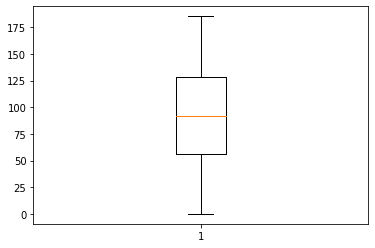

In [24]:
box(region_1['product'])


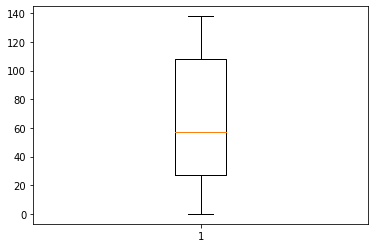

In [25]:
box(region_2['product'])

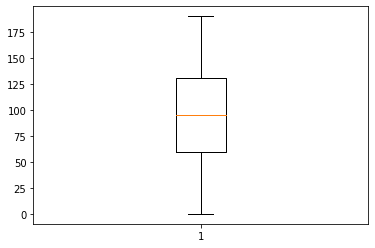

In [26]:
box(region_3['product'])

<font color=darkgreen> 
 
 ###  Экстремально больших или малых значений, способных повлиять на среднее, в большом количестве в выборке нет. При этом в регионе 2 есть разброс в высоких значениях, а значит вероятность попасть на скважину с большим нетто будет выше

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
такие аналитические выводы лучше ещё подкреплять графически: например ящик с усами. Там визуально можно оценить всё, что сказали (ну или опровергнуть)))
<br>
</font>

## 4. Прибыль по выбранным скважинам

In [27]:
def revenue(df):
    sort_predicted = df.sort_values('predicted', ascending = False).head(200)
    sort_real = df[df.index.isin(sort_predicted.index)]
    revenue = sort_real['product'].sum()*profit
    return revenue

### Регион 1

In [28]:
print ('Доход по предсказаниям', revenue(region_1))


Доход по предсказаниям 13494104192.112015


### Регион 2

In [29]:
print ('Доход по предсказаниям', revenue(region_2))

Доход по предсказаниям 12415086696.68151


### Регион 3

In [30]:
print ('Доход по предсказаниям', revenue(region_3))

Доход по предсказаниям 12571410631.960928


<font color=darkgreen> 

# Вывод
 
 ###  В случае с топовыми месторождениями картина изменилась. Регион 2 теперь не на много уступает остальным, но как мы помним у него меньший разброс. Проверим разброс по топовым значениям.

<font color='purple'>

## Ошибку в расчетах можно проверить. Так, в моем датафрейм одновременно находятся и таргеты и предсказания, то можно проссумировать их вручную, выбрав из таблицы первые 200 значений по убыванию. НО для того, чтобы получить прибыль, нужно отнять budget

In [31]:
def chek (df, value):
    chek = df.sort_values(value, ascending = False)[:200]
    print(chek.head())
    print()
    print('Доход по реальным',chek['product'].sum()*profit)
    print()
    #print('Баррель',chek['product'].sum())
    #print()
    print('Доход по предсказанным',chek['predicted'].sum()*profit)

In [32]:
chek(region_1, 'predicted')

          id        f0        f1         f2     product   predicted
51140  QFDWZ  1.092258 -0.541900  16.003790  182.079984  194.936305
83095  xuWxm  1.888221  0.067384  15.428372  144.009283  185.412580
51464  Fgte6  1.612452 -0.074593  15.230322  173.971897  185.117595
93073  S96Jh  1.814871 -0.207268  14.087536  162.810993  180.180713
52356  R5IYz  0.879559  0.258449  15.202838  123.920559  177.608048

Доход по реальным 13494104192.112015

Доход по предсказанным 14689596176.96032


In [33]:
chek(region_2, 'predicted')

          id         f0         f1        f2     product   predicted
26531  yLbdW -26.646255  -1.531112  5.001941  137.945408  140.359367
80439  kpPCd -23.884180  -3.773158  5.001008  137.945408  139.983257
55165  wcKNk -22.107811  -5.342910  5.006254  137.945408  139.901759
42738  XLXvP -19.384167 -15.314765  5.010972  137.945408  139.853808
38665  vz1OW -19.348001 -14.265995  5.010731  137.945408  139.818970

Доход по реальным 12415086696.68151

Доход по предсказанным 12524606161.715038


In [34]:
chek(region_3, 'predicted')

          id        f0        f1         f2     product   predicted
3540   4KBhu -2.548791  3.210600  16.739402  154.062998  176.120799
98714  C6aBZ -0.209583  1.174825  16.357645   98.664401  174.099141
25463  mMCBz -1.623992 -3.263073  16.313011  166.293929  173.986438
6647   AaIO6  1.046668 -1.970502  16.252444  152.294162  173.669179
69502  OYrnh -1.145417 -0.650543  16.223146  121.349438  173.378840

Доход по реальным 12571410631.960928

Доход по предсказанным 14063785590.942598


<font color='purple'>

## Как видно, все совпало    
## Если же намеренно сделать ошибку и провести сортировку по реальным значениям(чего в жизни мы сделать не сможем), то у нас получится красивый разброс:

In [35]:
chek(region_1, 'product')

          id        f0        f1        f2     product   predicted
8826   rjMou  1.797736  0.098212  6.148260  185.364347  123.467550
99818  7cHIv  0.518445 -0.412790  4.951916  185.362690  118.187687
94175  uCDzR  0.351428 -0.400244  7.227618  185.355615  132.414838
1925   IfqrC  0.624430 -0.469312  5.753677  185.354980  124.651458
45291  5FEPb  1.758787 -0.395038  6.719085  185.352015  134.044965

Доход по реальным 16635036568.082407

Доход по предсказанным 10619865383.688232


In [36]:
chek(region_2, 'product')

          id        f0         f1        f2     product   predicted
53864  MzRzn  2.901352  -3.475398  5.001393  137.945408  136.104749
97083  nW6eC -4.030430 -14.020643  5.009571  137.945408  137.562162
88340  xwJzQ -3.373117  -9.227661  4.994369  137.945408  136.951596
64879  Xd8DC -5.360281  -2.388204  5.001439  137.945408  137.279509
7288   Stdrb -8.058661  -2.244840  5.000753  137.945408  137.648963

Доход по реальным 12415086696.68151

Доход по предсказанным 12373192298.34683


In [37]:
chek(region_3, 'product')

          id        f0        f1        f2     product   predicted
79705  UAhji -2.747914  1.555227  3.342182  190.029838   99.705360
93444  IB0JE  3.026506  1.344623  8.891243  190.013589  131.569870
35099  2HeCn  2.848844 -1.701996  9.437101  190.011722  134.808012
21943  dldNH -2.500091  2.024392  6.291513  190.010982  116.529760
37870  CpuBi -0.686667 -3.219452  5.963290  190.010029  114.931783

Доход по реальным 17059632928.358982

Доход по предсказанным 9660872276.0044


<font color='purple'>

## Как видно из таблиц, ошибки быть не может. Разброс действительно наблюдается, но только если мы изначально проведем сортировку по таргетам, но условие задачи говорит нам:
  ##  Напишите функцию для расчёта прибыли по выбранным скважинам и ПРЕДСКАЗАНИЯМ модели:
 - 4.1. Выберите скважины с максимальными значениями предсказаний. Количество скважин зависит от бюджета компании и стоимости разработки одной скважины.
 - 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
 - 4.3. Рассчитайте прибыль для полученного объёма сырья.
    
 ## То есть топ - 200 необходимо определить по предсказаниям, а прибыль посчитать по реально добытым объемам, а разброс РЕАЛЬНОГО добытого оказался минимальным.

In [38]:
def RMSE200(df):
    sort_predicted = df.sort_values('predicted', ascending = False).head(200)
    sort_real = df[df.index.isin(sort_predicted.index)]
    rmse = mean_squared_error(sort_real['product'], sort_real['predicted'])**0.5
    return rmse

In [39]:
print('RMSE200 регион 1', RMSE200(region_1))

RMSE200 регион 1 27.630775253180992


In [40]:
print('RMSE регион 2', RMSE200(region_2))

RMSE регион 2 1.2433256443670808


In [41]:
print('RMSE регион 3', RMSE200(region_3))

RMSE регион 3 32.54079124559519


<font color=darkgreen> 
 
 ###  В случае с топовыми месторождениями разброс региона 2 увеличился, но тем не менее остается на порядки выше, чем у конкурентов.

## 5. Риски и прибыль для каждого региона

In [42]:
def risks_profit(df):
    alpha = .95
    random_state = np.random.RandomState(2)
    bootstrap_samples = 1000
    target = df['product']
    predictions = df['predicted']
    profits = []
    riscs = []
    for i in range (bootstrap_samples):
        predictions_subsample = predictions.sample(500, replace = True, random_state = random_state)
        data = df[df.index.isin(predictions_subsample.index)]
        local_rev = revenue(data)
        profits.append(local_rev - budget)
        riscs.append((local_rev - budget) < 0)
    profits = pd.Series(profits)
    riscs = pd.Series(riscs)
    mean_profit = profits.mean()
    risc_percent = round(riscs.mean()*100, 1)
    confidence_interval_mean = st.t.interval(alpha, len(profits)-1, loc=profits.mean(), scale=profits.sem())
    confidence_interval = (profits.quantile(0.025), profits.quantile(0.975))
    print('Средняя прибыль', mean_profit)
    print()
    print('Доверительный интервал', confidence_interval)
    print()
    print('Доверительный интервал по средним', confidence_interval_mean)
    print()
    print('Риск убытков', risc_percent,'%')

<font color='purple'>

## Local_rev - это прям доход, я использовал готовую функцию из первой части, поэтому просто вычитаю затраты

<font color='purple'>

## Проверю функцию на правильность работы.

In [43]:
df = region_1
bootstrap_samples = 1000
random_state = np.random.RandomState(2)
predictions = df['predicted']
profits = []
riscs = 0
summ = []
data_1 = []

for i in range (bootstrap_samples):
    # Определю переменную для бутстрап, посмотрю на нее в выводе на экран. В идеале это список из 500 значений предсказанных запасов
    predictions_subsample = predictions.sample(500, replace = True, random_state = random_state)
    # Во фрейм попадает 500 значений по индексу предсказанных, затем отсортирую их по убыванию и отсеку нижние значения для наглядности
    data = df[df.index.isin(predictions_subsample.index)].sort_values('predicted', ascending = False).head(200)
    #Проверю что минимаольные значения попадают во фрэйм
    data_1.append(data['product'].min())
    # На этапе расчета дохода, операция сортировки и отсечения повторится, но не затронет данные, так как лишнее уже отсечено
    rev = revenue(data)
    # Проверю локальные суммы
    local_sum = data['product'].sum()
    # Посчитаю прибыль и закину в профитс
    profits.append(rev - budget)
    # Закину локальные суммы в суммы
    summ.append(data['product'].sum())
    # Напишу логическое условие для счетчика обьема добычи и сравню с damage_level (2222,22)
    if data['product'].sum() < damage_level:
        riscs += 1
    
summ = pd.Series(summ)

In [44]:
# Тут лежат минимальнве значения, они попадают во фрейм, все в порядке с этим, я проверил. Можно убрать хэш и посмотреть,
# но как понимаешь их там 1000

#data_1

In [45]:
# Возьму минимальное значение среднего выборки со всего поля и представлю что все 200 скважин добывают минимальное количество, 
# сравню с 2222,22 
print(data['product'].min()*200)

901.4749851139147


<font color='purple'>

### Вывод - минимальные значения в сборках присутствуют

In [46]:
# Для объективности возьму наименьшее суммарное значение добычи из 1000 сэмплов
summ.min()

21054.563590668564

<font color='purple'>

### Вывод - теперь все в порядке)

In [47]:
# Соответсвенно наименьшая прибыль с поля будет 
summ.min()*profit-budget

-525446384.1991463

<font color='purple'>

### Вывод - тоже наладилось

<font color='purple'>

## Я проверил выборочно и по минимальным значениям, у меня получается, что все сборки полей при условии фильтрации 500 случайных по предсказаниям и сборкой 200 лучших по предсказаниям, в пересчете на реальные данные будут прибыльными. Если где-то есть ошибка, я вооще не понимаю где... Ну то есть я реально пытался ее найти. Первая мысль была в том, что не правильно сравниваются риски (то есть значение безубыточности неверно, но я его проверил выше по проекту и если 2222,22 барелля умножить на 450 000 рублей, то получится миллиард)

In [48]:
damage_level*profit

10000000000.0

In [49]:
risks_profit(region_1)

Средняя прибыль 417545589.0601342

Доверительный интервал (-86518998.52452075, 913234386.1916623)

Доверительный интервал по средним (401685019.09649813, 433406159.0237702)

Риск убытков 5.6 %


In [50]:
risks_profit(region_2)

Средняя прибыль 447591153.26428527

Доверительный интервал (31758584.930071544, 849392496.637085)

Доверительный интервал по средним (434958867.4319844, 460223439.0965861)

Риск убытков 1.8 %


In [51]:
risks_profit(region_3)

Средняя прибыль 358505397.3793633

Доверительный интервал (-178646298.99964452, 884821290.543188)

Доверительный интервал по средним (341813417.8903212, 375197376.8684054)

Риск убытков 9.1 %


<font color='purple'>

## Дополнил доверительным интервалом
## Также появились отрицательные доверительные интервалы 

<font color=darkgreen> 

# Вывод
 
 ###  Все регионы перспективны для разработки и дадут близкую прибыль, а риски равны 0. Если затарты на разработку сопоставимы и условия эдентичны, то наиболее привлекательные месторождения расположились в порядке: 
### - Регион 2
### - Регион 1
### - Регион 3
### Помимо прочьего регион 2 будет давать равномерную загрузку по скважинам.

In [52]:
def risks_profit_1(df):
    alpha = .95
    random_state = np.random.RandomState(2)
    bootstrap_samples = 1000
    target = df['product']
    predictions = df['predicted']
    profits = []
    riscs = []
    riscs_interval = []
    for i in range (bootstrap_samples):
        predictions_subsample = predictions.sample(500, replace = True, random_state = random_state)
        data = df[df.index.isin(predictions_subsample.index)]
        local_rev = revenue(data)
        profits.append(local_rev - budget) 
        riscs.append((local_rev - budget) < 0)
        riscs_interval.append((local_rev - budget) < pd.Series(profits).quantile(0.025))
    profits = pd.Series(profits)
    riscs = pd.Series(riscs)
    riscs_interval = pd.Series(riscs_interval)
    mean_profit = profits.mean()
    risc_percent = round(riscs.mean()*100, 1)
    riscs_interval = riscs_interval.mean()
    confidence_interval_mean = st.t.interval(alpha, len(profits)-1, loc=profits.mean(), scale=profits.sem())
    confidence_interval = (profits.quantile(0.025), profits.quantile(0.975))
        
    print('Средняя прибыль', mean_profit)
    print()
    print('Доверительный интервал', confidence_interval)
    print()
    print('Доверительный интервал по средним', confidence_interval_mean)
    print()
    print('Риск убытков по доверительному интервалу',  round(riscs_interval*100, 1),'%')
    print()
    print('Риск убытков', risc_percent,'%')

In [53]:
risks_profit_1(region_1)

Средняя прибыль 417545589.0601342

Доверительный интервал (-86518998.52452075, 913234386.1916623)

Доверительный интервал по средним (401685019.09649813, 433406159.0237702)

Риск убытков по доверительному интервалу 2.7 %

Риск убытков 5.6 %


In [54]:
risks_profit_1(region_2)

Средняя прибыль 447591153.26428527

Доверительный интервал (31758584.930071544, 849392496.637085)

Доверительный интервал по средним (434958867.4319844, 460223439.0965861)

Риск убытков по доверительному интервалу 2.1 %

Риск убытков 1.8 %


In [55]:
risks_profit_1(region_3)

Средняя прибыль 358505397.3793633

Доверительный интервал (-178646298.99964452, 884821290.543188)

Доверительный интервал по средним (341813417.8903212, 375197376.8684054)

Риск убытков по доверительному интервалу 2.9 %

Риск убытков 9.1 %


<font color=darkgreen> 

# Вывод
 
 ###  Все регионы перспективны для разработки и дадут близкую прибыль, а риски равны 0. Если затарты на разработку сопоставимы и условия эдентичны, то наиболее привлекательные месторождения расположились в порядке: 
### - Регион 2
### - Регион 1
### - Регион 3
### Помимо прочьего регион 2 будет давать равномерную загрузку по скважинам и в нем меньше всего сборок полей выпадает из левой границы доверительного интервала